In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!fusermount -u drive
!google-drive-ocamlfuse drive

/bin/bash: google-drive-ocamlfuse: command not found


In [ ]:
%cd /content/gdrive/MyDrive/projects

/content/gdrive/MyDrive/projects


In [ ]:
!mkdir cancer
!mv cancer.zip cancer

In [ ]:
%cd cancer/

/content/gdrive/My Drive/projects/cancer


In [ ]:
!unzip cancer.zip

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
base_dir = '/content/drive/My Drive/projects/cancer'

train_dir = os.path.join(base_dir, 'fold_0')
val_dir = os.path.join(base_dir, 'fold_1')

no_train_dir = os.path.join(train_dir, 'hem')
no_val_dir = os.path.join(val_dir, 'hem')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory('/content/gdrive/MyDrive/projects/cancer/fold_0/fold_0', target_size = (128,128), batch_size=32, class_mode='categorical')
test_fed = rescaled.flow_from_directory('/content/gdrive/MyDrive/projects/cancer/fold_1/fold_1', target_size = (128,128), batch_size=32, class_mode='categorical')

Found 3527 images belonging to 2 classes.
Found 3158 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(16, 3, activation='relu', input_shape=(128,128,3,)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(128, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       7

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import h5py

In [ ]:
erl_stop = EarlyStopping(monitor = 'val_loss', patience = 6, restore_best_weights=True)
mod_check = ModelCheckpoint(filepath='/content/gdrive/MyDrive/projects/cancer', monitor='val_loss', save_best_only=True)
lr_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1)

In [ ]:
history = model.fit_generator(train_fed, shuffle=True, epochs=20, validation_data=test_fed, callbacks=[erl_stop, mod_check, lr_rate], verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
111/111 - 6813s - loss: 0.9313 - accuracy: 0.7882 - val_loss: 0.3823 - val_accuracy: 0.8385
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/projects/cancer/assets
Epoch 2/20


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


111/111 - 93s - loss: 0.4406 - accuracy: 0.8183 - val_loss: 0.3794 - val_accuracy: 0.8445
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/projects/cancer/assets
Epoch 3/20


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


111/111 - 34s - loss: 0.4330 - accuracy: 0.8228 - val_loss: 0.3831 - val_accuracy: 0.8471
Epoch 4/20
111/111 - 22s - loss: 0.4120 - accuracy: 0.8296 - val_loss: 0.3670 - val_accuracy: 0.8474
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/projects/cancer/assets
Epoch 5/20


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


111/111 - 22s - loss: 0.3675 - accuracy: 0.8520 - val_loss: 0.3465 - val_accuracy: 0.8585
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/projects/cancer/assets
Epoch 6/20


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


111/111 - 22s - loss: 0.3270 - accuracy: 0.8659 - val_loss: 0.5097 - val_accuracy: 0.7983
Epoch 7/20
111/111 - 21s - loss: 0.3103 - accuracy: 0.8721 - val_loss: 0.3482 - val_accuracy: 0.8642
Epoch 8/20
111/111 - 21s - loss: 0.2765 - accuracy: 0.8897 - val_loss: 0.3524 - val_accuracy: 0.8654
Epoch 9/20
111/111 - 22s - loss: 0.2109 - accuracy: 0.9144 - val_loss: 0.3531 - val_accuracy: 0.8686
Epoch 10/20
111/111 - 21s - loss: 0.1636 - accuracy: 0.9351 - val_loss: 0.4048 - val_accuracy: 0.8594
Epoch 11/20
111/111 - 22s - loss: 0.1379 - accuracy: 0.9490 - val_loss: 0.3948 - val_accuracy: 0.8578


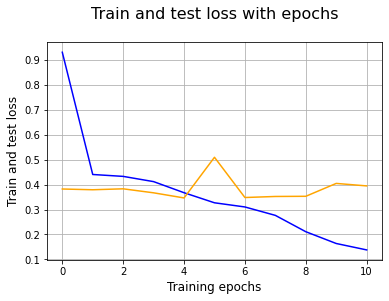

In [ ]:
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color='orange', label='train')
plt.grid(True)
plt.title("Train and test loss with epochs\n", fontsize = 16)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Train and test loss", fontsize = 12)
plt.show()

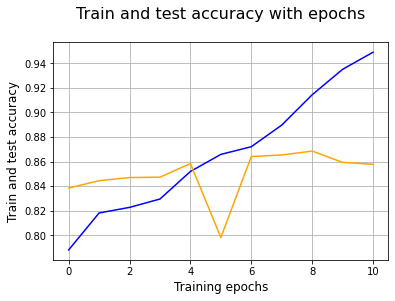

In [ ]:
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color='orange', label='train')
plt.grid(True)
plt.title("Train and test accuracy with epochs\n", fontsize = 16)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Train and test accuracy", fontsize = 12)
plt.show()

In [ ]:
acc = model.evaluate(test_fed, steps = len(test_fed), verbose = 2)
print('%.2f'%(acc[1]*100))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


99/99 - 10s - loss: 0.3465 - accuracy: 0.8585
85.85
